In [1]:
import torch
import sys
sys.path.append('../')
import dlc_practical_prologue as prologue
from importlib import reload
reload(prologue)
from dlc_practical_prologue import *
import Module, modules, optimizers, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *
from optimizers import *
torch.set_grad_enabled(False)

train_input, train_target, train_classes, test_input, test_target, test_classes = \
       load_random_datasets()


### Tests on mnist-pairs data

In [2]:
torch.set_default_tensor_type(torch.DoubleTensor)
train_input = train_input.view(len(train_input), -1).type(torch.DoubleTensor)
train_target = train_target.type(torch.DoubleTensor)
test_input = test_input.view(len(train_input), -1).type(torch.DoubleTensor)
test_target = test_target.type(torch.DoubleTensor)

nb_hidden1 = 100
nb_hidden2 = 40
#train_input = train_input.view(len(train_input), -1)
#train_target = train_target.type(torch.FloatTensor)
input_size = train_input.shape[1] # 392
nb_epochs = 300

model_mnist = Sequential(
    Linear('fc1', input_size, nb_hidden1), ReLU(),
    Linear('fc2', nb_hidden1, nb_hidden2), Tanh(),
    Linear('fc3', nb_hidden2, 1))

from torch import nn
model_mnist_torch = nn.Sequential(
    nn.Linear(input_size, nb_hidden1), nn.ReLU(),
    nn.Linear(nb_hidden1, nb_hidden2), nn.Tanh(),
    nn.Linear(nb_hidden2, 1))
set_initial_parameters(model_mnist, model_mnist_torch)
del nn

In [3]:
criterion_mnist = MSELoss()
optimizer_mnist = SGD(model_mnist, lr=0.01)
loss_history_mnist = []

for e in range(nb_epochs):
    optimizer_mnist.zero_grad()
    output_mnist = model_mnist(train_input) # torch.Size([1000, 1])
    loss_mnist = criterion_mnist(output_mnist.flatten(), train_target)
    loss_history_mnist.append(loss_mnist)
    grad_output_mnist = criterion_mnist.backward().view(-1,1)
    #print("e = {}, loss = {}".format(e, round(loss_mnist.item(), 5)))
    model_mnist.backward(grad_output_mnist)
    optimizer_mnist.step(loss_mnist)

print()
from torch import nn
torch.set_grad_enabled(True)
        
criterion_mnist_torch = nn.MSELoss()
optimizer_mnist_torch = torch.optim.SGD(model_mnist_torch.parameters(), lr=0.01)
loss_history_mnist_torch = []

for e in range(nb_epochs):
    optimizer_mnist_torch.zero_grad()
    output_mnist_torch = model_mnist_torch(train_input)
    loss_mnist_torch = criterion_mnist_torch(output_mnist_torch, train_target)
    loss_history_mnist_torch.append(loss_mnist_torch)
    #print("e = {}, loss = {}".format(e, round(loss_mnist_torch.item(), 5)))
    loss_mnist_torch.backward()
    optimizer_mnist_torch.step()
    
del nn
torch.set_grad_enabled(False)

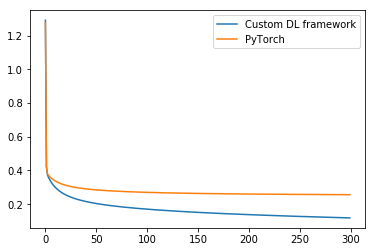

In [5]:
import matplotlib.pyplot as plt
plt.plot(loss_history_mnist, label='Custom DL framework')
plt.plot(loss_history_mnist_torch, label='PyTorch')
plt.legend()
plt.show()